# Use [Soundcard Oscilloscope](https://www.zeitnitz.eu/scope_en) to visualize the rotaion of IQ signals.
https://mriquestions.com/uploads/3/4/5/7/34572113/quad_signals_tutorial-lyons.pdf  
#### Use XY mode of [Soundcard Oscilloscope](https://www.zeitnitz.eu/scope_en) to visualize the rotaion of IQ signals.  

In [12]:
import os, sys

def gen_relative_path(target_path): 
    
    def del_same_parents(target_path, current_path):
        if len(target_path) * len(current_path) > 0:
            if target_path[0] == current_path[0]:
                target_path.pop(0)
                current_path.pop(0)
                del_same_parents(target_path, current_path)
            
    current_path = os.getcwd().replace('\\', '/').split('/')
    target_path = target_path.replace('\\', '/').split('/')
    del_same_parents(target_path, current_path)
    
    return ['..'] * len(current_path) + target_path


def append_source_relative_path(source_relative_path):
    sys.path.append(os.sep.join(source_relative_path))

In [13]:
# paths = ['']
# paths = [gen_relative_path(p) for p in paths]
# print(paths)

In [14]:
paths = [['..', '..', '..', '..', '..', 'Waves', 'bitbucket', 'github', 'codes'],
         ['..', 'codes']]

for path in paths:
    append_source_relative_path(path)

In [15]:
%pylab inline

from waves.sound import *

Populating the interactive namespace from numpy and matplotlib


In [16]:
import warnings 

warnings.filterwarnings('ignore')

In [17]:
def show_pair(sig_left, sig_right, frames = 300):
    sig_left.show(color = 'red', show_frames = slice(0, frames))
    sig_right.show(color = 'green', show_frames = slice(0, frames))

In [18]:
def plot_n_play(left, right):
    wf = Blender.dump_thinkdsp_waves([left, right])
    wf.normalize(use_datatype_max_value=False)
    wf.show(show_frames = slice(0, 300000))
    plt.show()
    wf.play()

## LO
#### Use XY mode of [Soundcard Oscilloscope](https://www.zeitnitz.eu/scope_en) to visualize the rotaion of IQ signals.

In [19]:
freq_sampling = DEFAULT_FRAMERATE

duration_seconds = 3
t = np.linspace(0, duration_seconds, duration_seconds * freq_sampling)

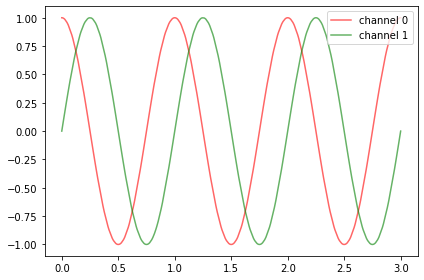

In [20]:
freq_lo = 1

LO_I = Channel(np.cos(PI2 * freq_lo * t), ts = t, framerate = freq_sampling)
LO_Q = Channel(np.sin(PI2 * freq_lo * t), ts = t, framerate = freq_sampling)
plot_n_play(LO_I, LO_Q)

### 正頻率

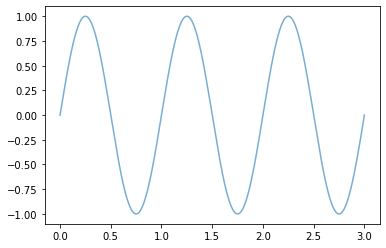

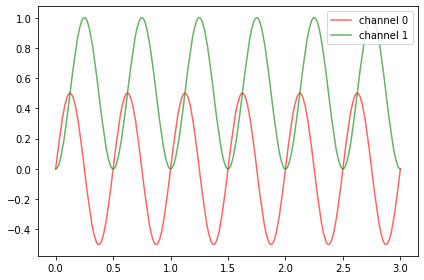

In [21]:
# RF = Channel(np.exp(1j* PI2 * freq_lo * t), ts = t, framerate = freq_sampling)
RF = Channel(np.sin(PI2 * freq_lo * t), ts = t, framerate = freq_sampling)
RF.show(show_frames = slice(0, 300000))
plt.figure()
plot_n_play(RF * LO_I, RF * LO_Q)

### 負頻率

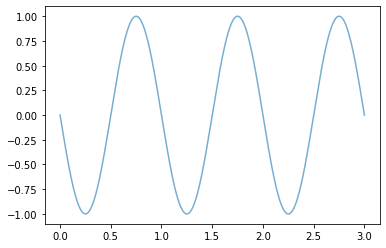

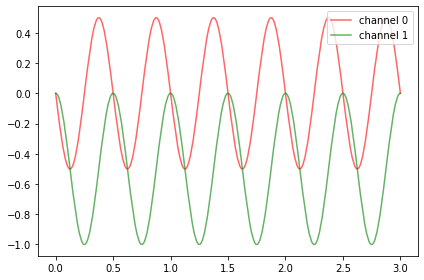

In [22]:
# RF = Channel(np.exp(1j* PI2 * -freq_lo * t), ts = t, framerate = freq_sampling)
RF = Channel(np.sin(PI2 * -freq_lo * t), ts = t, framerate = freq_sampling)
RF.show(show_frames = slice(0, 300000))
plt.figure()
plot_n_play(RF * LO_I, RF * LO_Q)

## Summary
- 聲波如果使用 sine 函數來產生，則可以使用 IQ demodulation 來分辨頻率的正負號
- 所以如果標註各種頻率的起點 是辨識聲波方向性的要件
- 正負頻率所產生的 sine 波形不同，Sine 成分是 辨識方向性的要素，但前提是要有一個標定的起點
- 頻率的正負號，可以用來判斷聲音是由前方或後方來的
- **但這是不可行的，因為 負頻率 延遲 $\frac{\pi}{2}$ 就變成正頻率，所以兩者其實是一樣的，除非聽覺上可以感知複數平面上的波型，但是聲波不是複數。**